### Jupyter Notebook for Training and Validation Statistics Plots in the Final Report

In [1]:
from plot import processing_logfile, plot
%matplotlib notebook
from matplotlib import pyplot as plt

# Process the log file and get the necessary training and validation statistics data
traint, validatet, bleut = processing_logfile('logs/log_tf_true.txt')
_, _, bleuf = processing_logfile('logs/log_tf_false.txt')
_, _, bleus = processing_logfile('logs/log_tf_ss.txt')

bleut = [element[3] for element in bleut]
bleuf = [element[3] for element in bleuf]
bleus = [element[3] for element in bleus]

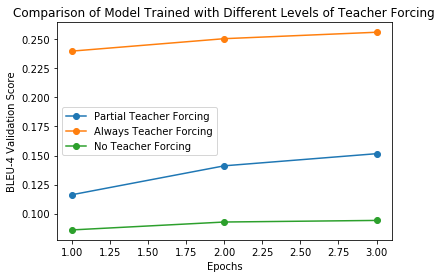

In [2]:
epochs = [1, 2, 3]
plt.plot(epochs, bleus, label="Partial Teacher Forcing", marker = 'o')
plt.plot(epochs, bleut, label="Always Teacher Forcing", marker = 'o')
plt.plot(epochs, bleuf, label="No Teacher Forcing", marker = 'o')
plt.xlabel("Epochs")
plt.ylabel("BLEU-4 Validation Score")
plt.legend(loc = 'center left')
plt.title('Comparison of Model Trained with Different Levels of Teacher Forcing')
plt.show()

In [3]:
_, _, bleu5 = processing_logfile('logs/log_alpha5.txt')

bleu5 = [element[3] for element in bleu5]

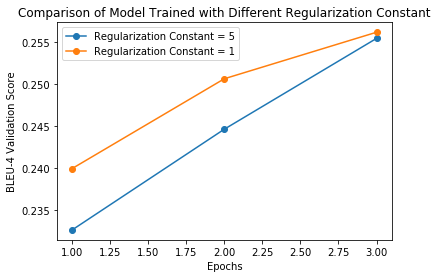

In [4]:
plt.plot(epochs, bleu5, label="Regularization Constant = 5", marker = 'o')
plt.plot(epochs, bleut, label="Regularization Constant = 1", marker = 'o')
plt.xlabel("Epochs")
plt.ylabel("BLEU-4 Validation Score")
plt.legend()
plt.title('Comparison of Model Trained with Different Regularization Constant')
plt.show()

In [5]:
_, _, bleur1 = processing_logfile('logs/log_resnet101.txt')
_, _, bleur5 = processing_logfile('logs/log_resnet50.txt')

bleur1 = [element[3] for element in bleur1]
bleur5 = [element[3] for element in bleur5]

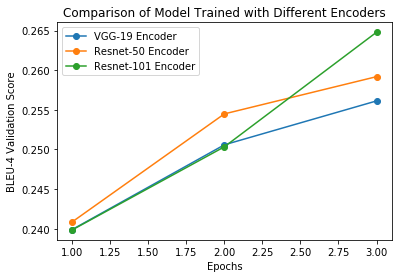

In [6]:
plt.plot(epochs, bleut, label="VGG-19 Encoder", marker = 'o')
plt.plot(epochs, bleur5, label="Resnet-50 Encoder", marker = 'o')
plt.plot(epochs, bleur1, label="Resnet-101 Encoder", marker = 'o')
plt.xlabel("Epochs")
plt.ylabel("BLEU-4 Validation Score")
plt.legend()
plt.title('Comparison of Model Trained with Different Encoders')
plt.show()

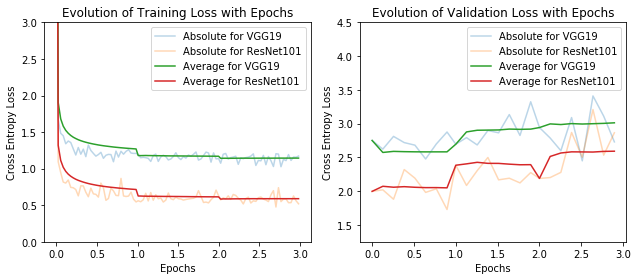

In [8]:
from plot import read_logfile, trim_data

train1, vdata1, bleu1 = read_logfile('logs/log_tf_true.txt')
data1 = trim_data(train1)
train2, vdata2, bleu2 = read_logfile('logs/log_resnet101.txt')
data2 = trim_data(train2)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4))
axes[0].clear()
axes[1].clear()

x_axis = [a for a,_,_,_,_,_,_ in data1]
loss1 = [a for _,a,_,_,_,_,_ in data1]
loss2 = [a for _,a,_,_,_,_,_ in data2]
loss3 = [a for _,_,a,_,_,_,_ in data1]
loss4 = [a for _,_,a,_,_,_,_ in data2]

top11 = [a for _,_,_,a,_,_,_ in data1]
top12 = [a for _,_,_,a,_,_,_ in data2]
top13 = [a for _,_,_,_,a,_,_ in data1]
top14 = [a for _,_,_,_,a,_,_ in data2]

top51 = [a for _,_,_,_,_,a,_ in data1]
top52 = [a for _,_,_,_,_,a,_ in data2]
top53 = [a for _,_,_,_,_,_,a in data1]
top54 = [a for _,_,_,_,_,_,a in data2]

vx_axis = [a for a,_,_,_,_,_,_ in vdata1]
vloss1 = [a for _,a,_,_,_,_,_ in vdata1]
vloss2 = [a for _,a,_,_,_,_,_ in vdata2]
vloss3 = [a for _,_,a,_,_,_,_ in vdata1]
vloss4 = [a for _,_,a,_,_,_,_ in vdata2]

vtop11 = [a for _,_,_,a,_,_,_ in vdata1]
vtop12 = [a for _,_,_,a,_,_,_ in vdata2]
vtop13 = [a for _,_,_,_,a,_,_ in vdata1]
vtop14 = [a for _,_,_,_,a,_,_ in vdata2]

vtop51 = [a for _,_,_,_,_,a,_ in vdata1]
vtop52 = [a for _,_,_,_,_,a,_ in vdata2]
vtop53 = [a for _,_,_,_,_,_,a in vdata1]
vtop54 = [a for _,_,_,_,_,_,a in vdata2]

axes[0].plot(x_axis, loss1, label='Absolute for VGG19', alpha=0.3)
axes[0].plot(x_axis, loss2, label='Absolute for ResNet101', alpha=0.3)
axes[0].plot(x_axis, loss3, label='Average for VGG19')
axes[0].plot(x_axis, loss4, label='Average for ResNet101')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Cross Entropy Loss')
axes[0].legend()
axes[0].set_ylim(0, 3)
axes[0].set_title('Evolution of Training Loss with Epochs')

axes[1].plot(vx_axis, vloss1, label='Absolute for VGG19', alpha=0.3)
axes[1].plot(vx_axis, vloss2, label='Absolute for ResNet101', alpha=0.3)
axes[1].plot(vx_axis, vloss3, label='Average for VGG19')
axes[1].plot(vx_axis, vloss4, label='Average for ResNet101')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Cross Entropy Loss')
axes[1].legend()
axes[1].set_ylim(1.25, 4.5)
axes[1].set_title('Evolution of Validation Loss with Epochs')

plt.tight_layout()
fig.canvas.draw()

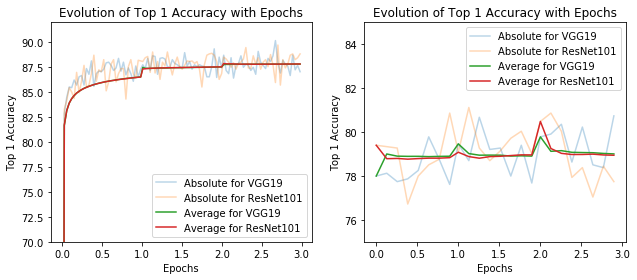

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4))
axes[0].clear()
axes[1].clear()

axes[0].plot(x_axis, top11, label='Absolute for VGG19', alpha=0.3)
axes[0].plot(x_axis, top12, label='Absolute for ResNet101', alpha=0.3)
axes[0].plot(x_axis, top13, label='Average for VGG19')
axes[0].plot(x_axis, top14, label='Average for ResNet101')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Top 1 Accuracy')
axes[0].legend()
axes[0].set_ylim(70, 92)
axes[0].set_title('Evolution of Top 1 Accuracy with Epochs')

axes[1].plot(vx_axis, vtop11, label='Absolute for VGG19', alpha=0.3)
axes[1].plot(vx_axis, vtop12, label='Absolute for ResNet101', alpha=0.3)
axes[1].plot(vx_axis, vtop13, label='Average for VGG19')
axes[1].plot(vx_axis, vtop14, label='Average for ResNet101')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Top 1 Accuracy')
axes[1].legend()
axes[1].set_ylim(75, 85)
axes[1].set_title('Evolution of Top 1 Accuracy with Epochs')

plt.tight_layout()
fig.canvas.draw()

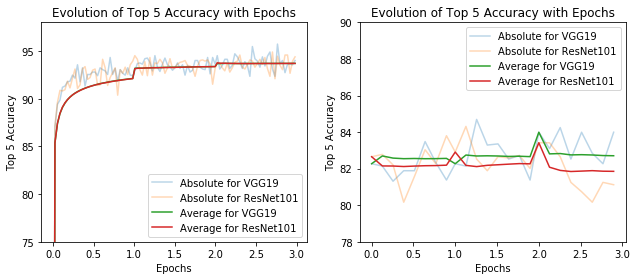

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4))
axes[0].clear()
axes[1].clear()

axes[0].plot(x_axis, top51, label='Absolute for VGG19', alpha=0.3)
axes[0].plot(x_axis, top52, label='Absolute for ResNet101', alpha=0.3)
axes[0].plot(x_axis, top53, label='Average for VGG19')
axes[0].plot(x_axis, top54, label='Average for ResNet101')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Top 5 Accuracy')
axes[0].legend()
axes[0].set_ylim(75, 98)
axes[0].set_title('Evolution of Top 5 Accuracy with Epochs')


axes[1].plot(vx_axis, vtop51, label='Absolute for VGG19', alpha=0.3)
axes[1].plot(vx_axis, vtop52, label='Absolute for ResNet101', alpha=0.3)
axes[1].plot(vx_axis, vtop53, label='Average for VGG19')
axes[1].plot(vx_axis, vtop54, label='Average for ResNet101')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Top 5 Accuracy')
axes[1].legend()
axes[1].set_ylim(78, 90)
axes[1].set_title('Evolution of Top 5 Accuracy with Epochs')

plt.tight_layout()
fig.canvas.draw()